In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv('witout_petoh.csv')
data= data.drop('Unnamed: 0',axis=1)
data.head()

,Channel,TGS2602,TGS2620,TGS2610,MQ2,MQ4,MQ7,MQ8,MQ135
0,1.0,1.134746,1.120463,1.025424,1.063077,1.017172,0.999850,1.072222,0.733143
1,1.0,2.857923,1.208169,1.076923,1.058333,1.051685,0.999694,1.080357,0.962903
2,1.0,2.459722,1.212391,1.589965,1.093103,1.082759,0.998921,1.084211,0.787333
3,1.0,2.643147,1.214076,1.522000,1.089655,1.088795,0.999071,1.088393,0.833099
4,1.0,2.764835,1.222781,1.727881,1.041071,1.062500,1.000837,1.066667,0.925862


In [22]:
#sensor selection
#Sensor selection
drop_sensor = ['MQ7', 'MQ135']
data = data.drop(drop_sensor, axis = 1)
data

KeyError: "['MQ7', 'MQ135'] not found in axis"

In [21]:
#PCA 수행
#data scaling
data_sample=data.drop("Channel",axis=1)
target=data["Channel"]

scaler=StandardScaler()
data_scaled = scaler.fit_transform(data)

pca=PCA(n_components=2)
pca.fit(data_scaled)
df_pca=pca.transform(data_scaled)
df_pca

KeyError: "['Channel'] not found in axis"

In [5]:
df_pca=pd.DataFrame(data=df_pca)
df_pca['Channel']=data['Channel']
df_pca

,0,1,Channel
0,-1.081045,1.201358,1.0
1,-0.192147,1.687761,1.0
2,0.325760,1.640458,1.0
3,0.338186,1.668569,1.0
4,0.376392,1.824263,1.0
...,...,...,...
1102,1.148790,-1.095305,9.0
1103,1.601643,-0.974915,9.0
1104,1.420586,-1.064935,9.0
1105,1.776522,-0.971071,9.0


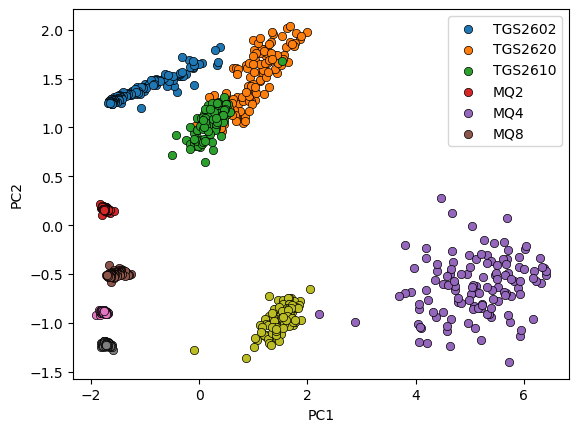

In [11]:

for i,marker in enumerate(df_pca["Channel"]):
    x_val=df_pca[df_pca["Channel"]==i+1][0]
    y_val=df_pca[df_pca["Channel"]==i+1][1]
    plt.scatter(x_val, y_val, edgecolors='#000000', linewidth=0.5)
plt.legend(["TGS2602","TGS2620","TGS2610","MQ2","MQ4","MQ8"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

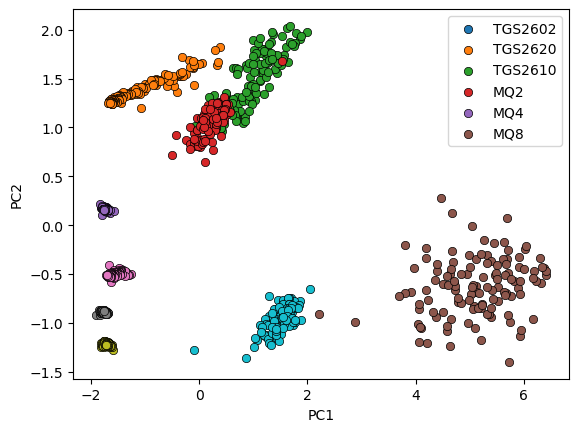

In [12]:
for i,marker in enumerate(df_pca["Channel"]):
    x_val=df_pca[df_pca["Channel"]==i][0]
    y_val=df_pca[df_pca["Channel"]==i][1]
    plt.scatter(x_val, y_val, edgecolors='#000000', linewidth=0.5)
plt.legend(["TGS2602","TGS2620","TGS2610","MQ2","MQ4","MQ8"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [8]:
data_sample=data.drop('Channel',axis=1)
data_scaled = StandardScaler().fit_transform(data_sample)

# 2개의 클래스로 구분하기 위한 LDA 생성
lda = LinearDiscriminantAnalysis(n_components=2)

# fit()호출 시 target값 입력 
lda.fit(data_scaled , data['Channel'])
data_lda = lda.transform(data_scaled)
print(data_lda)
lda_columns=['lda_component_1','lda_component_2']
data_lda = pd.DataFrame(data_lda, columns=lda_columns)
data_lda['target']=data['Channel']

[[-2.69271607 -0.138006  ]
 [-1.38349337  2.96401089]
 [-0.21681045  2.38844717]
 ...
 [ 3.3306447   4.48795675]
 [ 3.73764036  5.36371925]
 [ 2.8489386   5.49761163]]


In [9]:
data_lda=pd.DataFrame(data=data_lda)
data_lda

,lda_component_1,lda_component_2,target
0,-2.692716,-0.138006,1.0
1,-1.383493,2.964011,1.0
2,-0.216810,2.388447,1.0
3,-0.151548,2.471246,1.0
4,-1.066594,3.512436,1.0
...,...,...,...
1102,1.964645,5.315833,9.0
1103,3.140052,5.350782,9.0
1104,3.330645,4.487957,9.0
1105,3.737640,5.363719,9.0


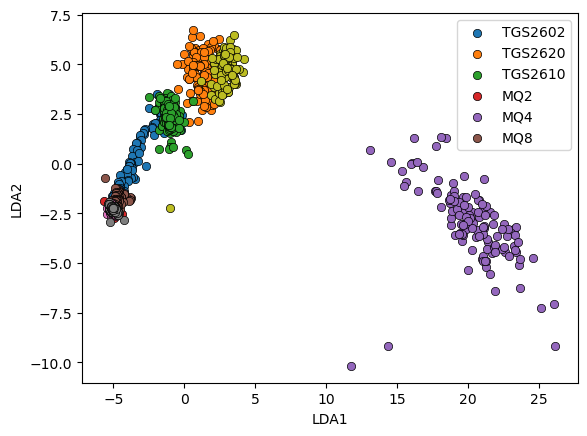

In [13]:
for i, marker in enumerate(data_lda['target']):
    x_val=data_lda[data_lda["target"]==i+1]['lda_component_1']
    y_val=data_lda[data_lda["target"]==i+1]['lda_component_2']
    plt.scatter(x_val, y_val, edgecolors='#000000', linewidth=0.5)
    
plt.legend(["TGS2602","TGS2620","TGS2610","MQ2","MQ4","MQ8"])
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.show()